In [50]:
#loading our libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [51]:
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


As we can see above , we have a lot of missing values. We can't drop them all because it will reduce the data we have , so instead we shall perform mean imputation and replacing missing values with the most frequent data

In [55]:
df_replace_mode = data.copy() # making a copy of the data

In [56]:
clean_data = data
clean_data['Age'] = clean_data['Age'].fillna(clean_data['Age'].mean())

In [57]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [58]:
cabin_count = clean_data['Cabin']
cabin_info = cabin_count.isnull().sum()

In [59]:
print(cabin_info)# we have 687 missing values

687


# Frequent categoty imputation

In [60]:
dataframe = clean_data.copy()

In [61]:
len(dataframe['Cabin'].unique()) #unique values in cabin column

148

In [62]:
len(dataframe['Embarked'].unique())

4

In [63]:
print('number of categories in :')
for colname in dataframe [['Cabin', 'Embarked']]:
    print("{} = {}".format(colname , len(dataframe[colname].unique())))

number of categories in :
Cabin = 148
Embarked = 4


<AxesSubplot:>

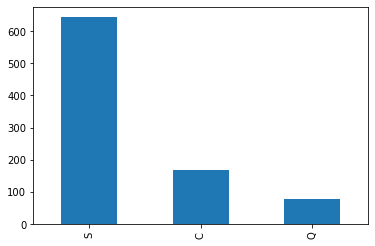

In [64]:
dataframe['Embarked'].value_counts().plot.bar()

<AxesSubplot:>

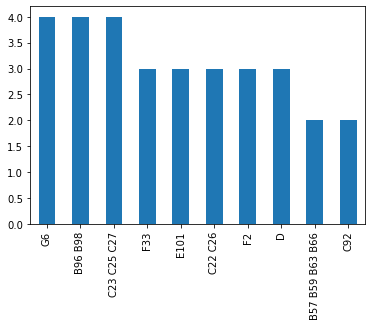

In [65]:
dataframe['Cabin'].value_counts().head(10).plot.bar()

In [66]:
def impute_nan_most_frequent_category (dataframe , colname):
    #.mode()[0]- gives first category name
    most_frequent_category = dataframe[colname].mode()[0]
    # replace nan values with the most occured category
    dataframe[colname + "_imputed"] =  dataframe[colname]
    dataframe[colname + "_imputed"].fillna(most_frequent_category , inplace = True)
            
                                                    

In [67]:
for columns in ['Cabin', 'Embarked']:
    impute_nan_most_frequent_category(dataframe , columns)
dataframe.head()    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_imputed,Embarked_imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,B96 B98,S


In [68]:
# drop the columns and leave imputed ones
clean_df = dataframe.drop(['Embarked' , 'Cabin'] , axis = 1)

In [69]:
clean_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin_imputed,Embarked_imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


## Done cleaning the data , Time for EDA : )

# Univariate Analysis

1. Univariate analysis is the simplest form of analysis , where we explore 
a single variable
2. Univariate analysis is performed to describe data in a better way
3. univariate analysis is differently on both numerical and categorical variables


## Categorical data

A variable that has a text based infomation is reffered to categorical variables.
Lets take a look on variuos plots we can use for visuallizing cat data

### countplot

1. countplot is used to visualise frequency in the data in form of a bar graph.
2. When we use the pandas’ value counts function on any column, It is the same visual form of the value counts function. In our data-target variable is survived and it is categorical so let us plot a countplot of this.


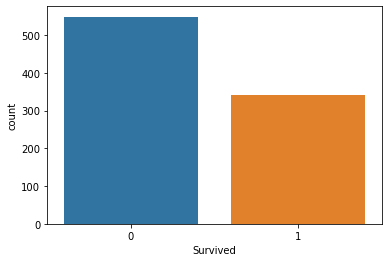

In [70]:
sns.countplot(clean_df['Survived'])
plt.show()

## Pie chart

Pie chart is similar to countplot ,but pie charts gives infomation about the percentage presence in each category.
Lets do a pie chart on out sex column and get the sense of our data distrubution

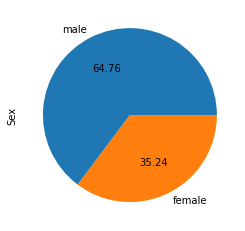

In [71]:
clean_df['Sex'].value_counts().plot(kind = 'pie' , autopct = '%.2f')
plt.show()

As we can see above most of the indiviuduals in our dataset are males with a percentage of 64.76 % and females with 35.24%

# Numerical Data

Anslyzing numerical data is the most important because understanding
the distrubution of variables helps you further process data. 
Most of the time you will find much incosistency with numerical 
data ,so do explore numerical data

## Histogram

A histogram is a value distribution plot of numerical columns. It basically creates bins in various ranges in values and plots it where we can visualize how values are distributed. We can have a look where more values lie like in positive, negative, or at the center(mean). Let’s have a look at the Age column.

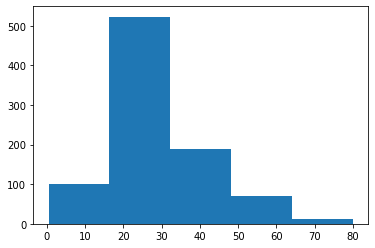

In [46]:
plt.hist(clean_df['Age'], bins=5)
plt.show()

As we can see on the chart is that most

### Distplot

Distplot is also known as the second Histogram because it is a slight improvement version of the Histogram. Distplot gives us a KDE(Kernel Density Estimation) over histogram which explains PDF(Probability Density Function) which means what is the probability of each value occurring in this column.

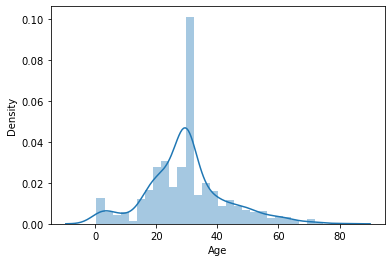

In [47]:
sns.distplot(clean_df['Age'])
plt.show()

# Multivariate / Bivariate  analysis

In [48]:
from seaborn import load_dataset
tips = load_dataset("tips")

In [49]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


We have study about various plots to explore single categorical and numerical data. Bivariate Analysis is used when we have to explore the relationship between 2 different variables and we have to do this because, in the end, our main task is to explore the relationship between variables to build a powerful model. And when we analyze more than 2 variables together then it is known as Multivariate Analysis. we will work on different plots for Bivariate as well on Multivariate Analysis.

### Numerical and numerical

To plot a relationship between two numrical variables , we use scatter plot.
Let's see the relationship between total bill and tips using a scatter plot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

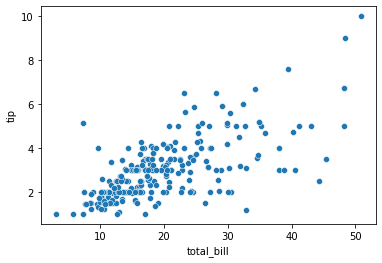

In [72]:
sns.scatterplot(tips['total_bill'], tips['tip'])

# Multivariate Analysis

Suppose we want to find a relationship between more than two variables,
for example sex , total_bill and tips . We can visualize the relationship with scatterplots 

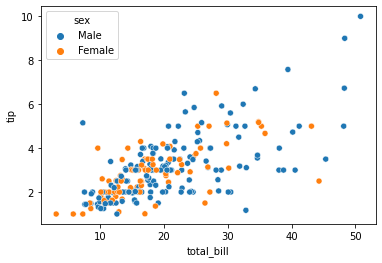

In [73]:
sns.scatterplot(tips["total_bill"], tips["tip"], hue=tips["sex"])
plt.show()



We can also see 4 variable multivariate analyses with scatter plots using style argument. Suppose now along with gender I also want to know whether the customer was a smoker or not so we can do this.

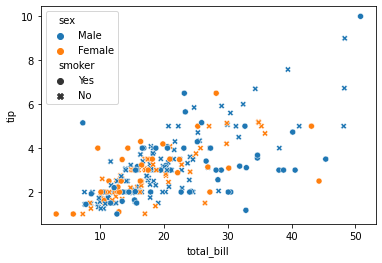

In [74]:
sns.scatterplot(tips["total_bill"], tips["tip"], hue=tips["sex"], style=tips['smoker'])
plt.show()

# Numerical and Categorical

# Bar plot

If one variable is numerical and one is categorical then there are various plots that we can use for Bivariate and Multivariate analysis.

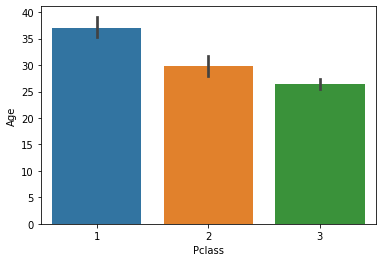

In [75]:
sns.barplot(data['Pclass'], data['Age'])
plt.show()

# Multivariate analysis using Bar plot

Hue’s argument is very useful which helps to analyze more than 2 variables. Now along with the above relationship we want to see with gender.



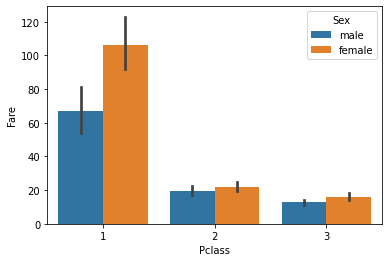

In [76]:
sns.barplot(data['Pclass'], data['Fare'], hue = data["Sex"])
plt.show()

# Boxplot

We have already study about boxplots in the Univariate analysis above. we can draw a separate boxplot for both the variable. let us explore gender with age using a boxplot.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

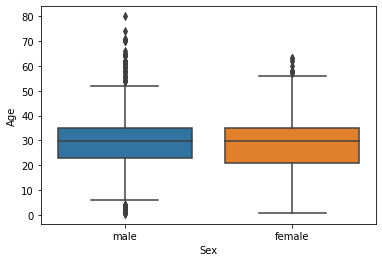

In [77]:
sns.boxplot(data['Sex'], data["Age"])

# Multivariate analysis with boxplot

Along with age and gender let’s see who has survived and who has not.

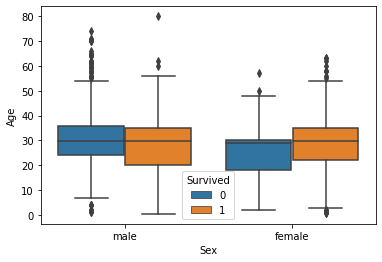

In [80]:
sns.boxplot(clean_df['Sex'], clean_df["Age"], clean_df["Survived"])
plt.show()

# Distplot

Distplot explains the PDF function using kernel density estimation. Distplot does not have a hue parameter but we can create it. suppose we want to see the probability of people with an age range that of survival probability and find out whose survival probability is high to the age range of death ratio.

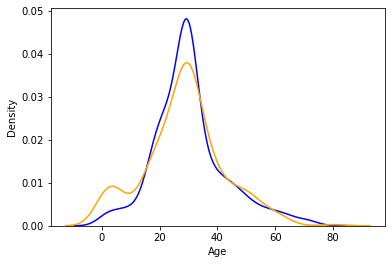

In [81]:
sns.distplot(data[clean_df['Survived'] == 0]['Age'], hist=False, color="blue") 
sns.distplot(data[clean_df['Survived'] == 1]['Age'], hist=False, color="orange")
plt.show()

As we can see the graph is really very interesting. the blue one shows the probability of dying and the orange plot shows the survival probability. If we observe it we can see that children’s survival probability is higher than death and which is the opposite in the case of aged peoples. This small analysis tells sometimes some big things about data and It helps while preparing data stories.

# Categorical to Categorical

Now we will work on categorical and categorical columns.

# Heatmap

If you have ever used a crosstab function of pandas then Heatmap is a similar visual representation of that only. It basically shows that how much presence of one category concerning another category is present in the dataset. let me show first with crosstab and then with heatmap.

In [82]:
pd.crosstab(clean_df['Pclass'], clean_df['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Now with heatmap, we have to find how many people survived and died.

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

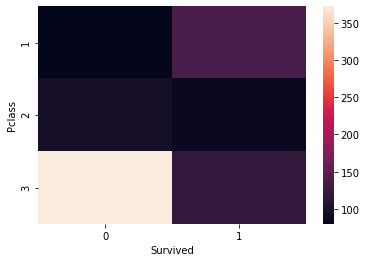

In [83]:
sns.heatmap(pd.crosstab(clean_df['Pclass'], clean_df['Survived']))

EDA is only a key to understand and represent your data in a better way which in result helps you to build a powerful and more generalized model. Data visualization is easy to perform EDA which makes it easy to make others understand our analysis.